In [1]:
import numpy as np
import time
#
start = time.time()
rep = 500
natom = 250
dataset = np.loadtxt("history.csv", dtype = np.float32, delimiter = ",", skiprows=1)
dataset = dataset[:natom*rep, 0:3]
xyz = np.reshape(dataset, (rep, natom, 3))
#print(xyz)
volume_df = np.loadtxt("thermodynamics.csv", dtype = np.float32, delimiter = ",", skiprows = 1)
volume_df = volume_df[:natom*rep, 2]
#print(volume_df)

In [2]:
from m3l.structure import System as sys
import json
#
system = sys()
system.loadSystem('system_Ar_mc.json')
cell = [item.item() for item in system.cell]

In [3]:
def mic(x, y, z):
    x = x - cell[0]*int(2.0*x/cell[0])
    y = y - cell[1]*int(2.0*y/cell[1])
    z = z - cell[2]*int(2.0*z/cell[2])
    dr = np.sqrt(x**2+y**2+z**2)
    return(dr.item())

r = []
for i in range(rep):
    dr = []
    for j in range(natom):
        for k in range(j+1, natom):
            x = (xyz[i, k, 0]-xyz[i, j, 0])
            y = (xyz[i, k, 1]-xyz[i, j, 1])
            z = (xyz[i, k, 2]-xyz[i, j, 2])
            dr.append(mic(x, y, z))
        r.append(dr)
#            var = np.sqrt(x**2+y**2+z**2)
#            r.append(var.item())

In [4]:
rl0 = 2.0
rlmax = 12
dr = 0.1
nx = int((rlmax-rl0)/dr)
dr = (rlmax-rl0)/float(nx)
rl = np.linspace(rl0, rlmax, num = nx)
nl = int(0.5*natom*(natom-1))
gr = []
#for dri in rl:
#    count = 0
#    for item in r:
#        if item > (dri-0.5*dr) and item <= (dri+0.5*dr):
#            count += 2
#    vol = (4*3.14*((dri+0.5*dr)**3-(dri-0.5*dr)**3))/3.0
#    gr.append(count*cell[0]*cell[1]*cell[2]/(rep*natom*natom*vol))
for dri in rl:
    sum_ = 0.0
    for i in range(rep):
        count = 0
        for j in range(nl):
            if r[i][j] > (dri-0.5*dr) and r[i][j] <= (dri+0.5*dr):
                count += 2
        vol = (4*3.14*((dri+0.5*dr)**3-(dri-0.5*dr)**3))/3.0
        sum_ += count*volume_df[i]/(natom*natom*vol)
    gr.append(sum_/rep)
#
end = time.time()
print(f'Elapsed time: {end - start}')

Elapsed time: 718.6186573505402


In [5]:
# dados experimentais
xl = [3.211, 3.309, 3.374, 3.52, 3.634, 3.747, 3.894, 4.04, 4.267, 4.43, 4.836, 5.194, 5.632, 5.957, 6.282, 6.77, 7.111, 7.484, 7.842, 8.183, 8.459, 8.817, 11.465, 12.001]
yl = [0.042, 0.207, 1.056, 2.498, 3.301, 3.347, 2.9, 1.938, 1.444, 1.056, 0.47, 0.503, 0.681, 0.826, 1.016, 1.188, 1.174, 1.069, 0.997, 0.964, 0.944, 0.951, 0.984, 0.997]

Text(0.5, 0, 'r')

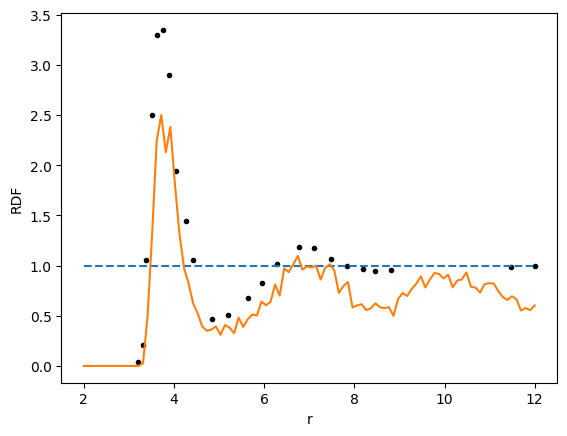

In [6]:
from matplotlib import pyplot as plt
plt.scatter(xl, yl, marker = '.', color = 'black')
plt.plot(rl, np.repeat(1.0, len(rl)), linestyle = 'dashed')
plt.plot(rl, gr)
plt.ylabel('RDF')
plt.xlabel('r')
#plt.xlim(rl0, rlmax)